## Data Analysis 
### Yi Fu

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

#### Import the dataset

In [142]:
data = pd.read_csv("data.csv", encoding= 'unicode_escape')
print(data.head(10))
data.shape

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75  

(541909, 8)

In [143]:
# extracting the first 10,000 rows as our main dataset
data = data.head(10000)
data.shape

(10000, 8)

In [144]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

#### Check for and deal with missing values 

In [145]:
# Checking for missing values
missing = data.isnull().sum() 
missing

InvoiceNo         0
StockCode         0
Description      42
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     2291
Country           0
dtype: int64

In [146]:
# dealing with missing values
data.fillna({'Description': 'NONE'}, inplace = True)
data.fillna({'CustomerID': 0.0}, inplace = True)
missing = data.isnull().sum()
missing

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Outliers visualization

<AxesSubplot:xlabel='UnitPrice'>

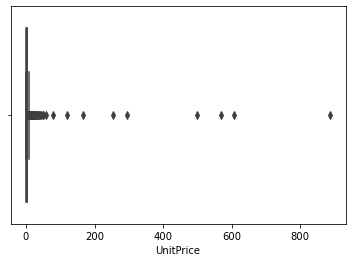

In [39]:
# Visualize outliers
sns.boxplot(x = data['UnitPrice'])

<AxesSubplot:xlabel='Quantity'>

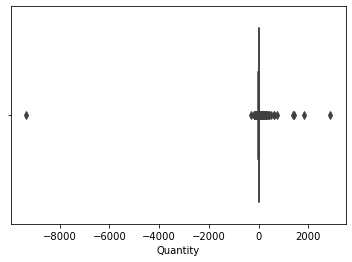

In [38]:
sns.boxplot(x = data['Quantity'])

#### Description of statistics

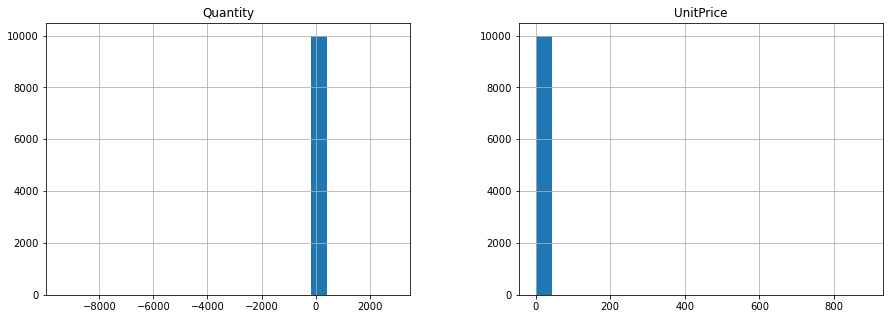

In [58]:
data.select_dtypes(include = np.number).hist(bins = 20, figsize = (15,5))
plt.show()

We can observe from the plot that 'Quantity' values are mostly between -1000 to 1000 and 'UnitPrice' values are mostly between 0 to 1000.

In [79]:
data.describe()

,Quantity,UnitPrice
count,10000.000000,10000.000000
mean,7.828600,3.837412
std,104.322417,14.310148
min,-9360.000000,0.000000
25%,1.000000,1.250000
50%,2.000000,2.510000
75%,8.000000,4.210000
max,2880.000000,887.520000


All the statistics are provided in the table above. We can see that the mean of 'Quantity' is greater than that of 'UnitPrice'. Moreover, the values of 'Quantity' ranges from -9360 to 2880, and the values of 'UnitPrice' ranges from 0 to 887.52, which indicates that the range of 'Quantity' is larger than the range of 'Unitprice'. From the standard deviation values, we can conclude that the 'Quantity' data are widely spread while 'UnitPrice' data are not much spread out.

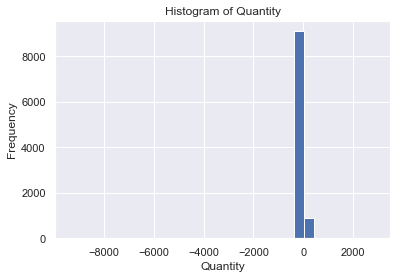

In [133]:
plt.hist(data['Quantity'], bins = 30)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')
plt.show()

Most of the values in 'Quantity' is around -1000 to 1000.

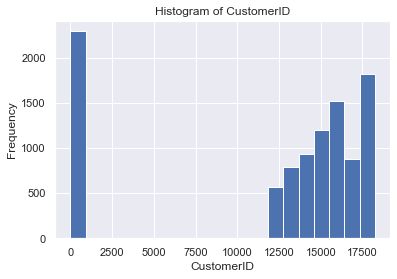

In [149]:
plt.hist(data['CustomerID'], bins = 20)
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.title('Histogram of CustomerID')
plt.show()

Most of the values in 'CustomerID' is between 0 and 1250 and between 11250 and 18750. In other words, there are little values lie between 2500 and 11250.

In [152]:
# unique value counts for column 'Country'
pd.value_counts(data.Country) 

United Kingdom    9403
Germany            181
EIRE               109
France             106
Norway              73
Lithuania           34
Italy               24
Japan               16
Australia           14
Belgium             12
Poland               8
Portugal             7
Switzerland          6
Spain                5
Netherlands          2
Name: Country, dtype: int64

C:\Users\YI FU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


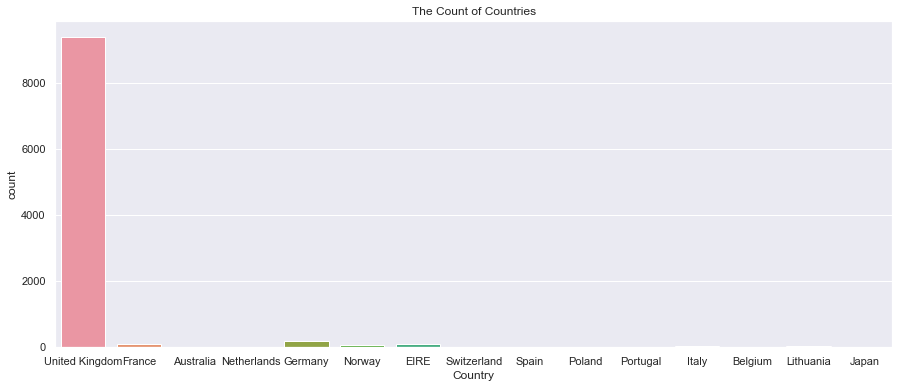

In [153]:
# Vasualize it 
plt.subplots(figsize = (15,6))
sns.countplot(data['Country'])
plt.title('The Count of Countries')
plt.show()

There are 15 distinct countries in our dataset, and the frequency of United Kingdom far outnumbers that of other countries.

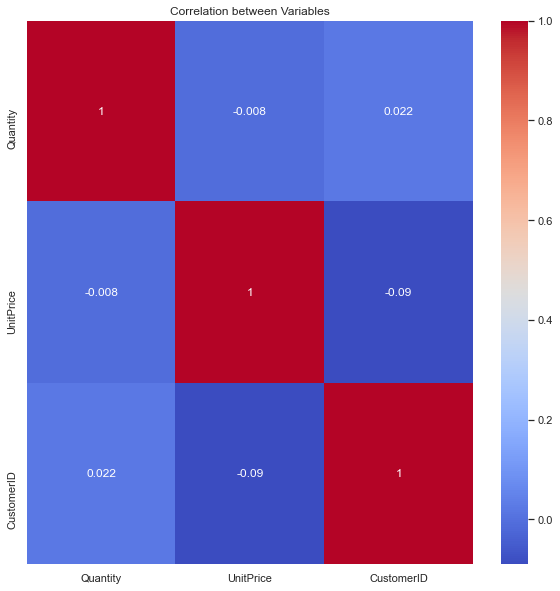

In [157]:
# Correlation between variables
cor = data.corr()
figure,ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor, annot=True, cmap='coolwarm')
ax.set_title("Correlation between Variables")
plt.show()

We can observe that 'Quantity' and 'UnitPrice' is negatively and weakly correlated. 